# I. Data and package preparation



## A. Data preparation

In [43]:
pip install transformers

In [44]:
import numpy as np
import pandas as pd
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix, classification_report
## for word embedding
import gensim
import gensim.downloader as gensim_api
## for deep learning
from tensorflow.keras import models, layers, preprocessing as kprocessing
from tensorflow.keras import backend as K
# ## for bert language model
import transformers
import matplotlib.pyplot as plt

In [45]:
import gdown
id = "1b2lwGLOlar5ml9iTv89bwK_81CdtMMiQ"
gdown.download(id=id, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1b2lwGLOlar5ml9iTv89bwK_81CdtMMiQ
To: /content/assets01(ful)_04_18_2022.csv
100%|██████████| 182M/182M [00:00<00:00, 324MB/s]


'assets01(ful)_04_18_2022.csv'

In [46]:
df=pd.read_csv('assets01(ful)_04_18_2022.csv')
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (16,40,63,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,num_sales,background_color,image_url,image_preview_url,image_thumbnail_url,image_original_url,animation_url,animation_original_url,name,...,token_id_total_supply,token_id_count,token_id_num_owners,token_id_average_price,token_id_num_reports,token_id_market_cap,token_id_floor_price,asset_favorites,asset_category,creator
0,201652920,0,NaN,https://lh3.googleusercontent.com/pUDYH7EnULJc...,https://lh3.googleusercontent.com/pUDYH7EnULJc...,https://lh3.googleusercontent.com/pUDYH7EnULJc...,NaN,NaN,NaN,#3365,...,9970.0,9970.0,158,0.061149,1,0.000000,0,4,art,NaN
1,76611595,0,NaN,https://lh3.googleusercontent.com/NixgIufh8tt9...,https://lh3.googleusercontent.com/NixgIufh8tt9...,https://lh3.googleusercontent.com/NixgIufh8tt9...,NaN,NaN,NaN,Byteosaurus #8403,...,9654.0,9654.0,2244,0.048864,5,166.559894,0,1,art,NaN
2,171963423,0,NaN,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,https://lh3.googleusercontent.com/F7JUs4kn5gfm...,NaN,NaN,NaN,crypto-totem#3597,...,5555.0,5555.0,66,0.019342,1,105.545000,0,7,art,NaN
3,126146016,0,NaN,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,https://lh3.googleusercontent.com/pUq0zWz_C1tn...,NaN,NaN,NaN,UltraPunk #3167,...,9997.0,9997.0,1031,0.050662,1,133.888393,0,2,art,NaN
4,266557610,2,NaN,https://lh3.googleusercontent.com/ndXzObLk0INB...,https://lh3.googleusercontent.com/ndXzObLk0INB...,https://lh3.googleusercontent.com/ndXzObLk0INB...,https://gateway.pinata.cloud/ipfs/QmTebXSjfphW...,NaN,NaN,AlphieWhale #6996,...,7777.0,7777.0,4870,0.122659,199,441.598549,0,1,art,NaN


In [47]:
# describe the original data
print(f'The shape of raw data is {df.shape}.\n')
print(f'The columns of raw data is {df.columns}\n')
print(f'There are {len(df.asset_category.unique())} categories.\n\nAnd they are {df.asset_category.unique()}')
print('\n')
print(df.asset_category.value_counts())

The shape of raw data is (19541, 130).

The columns of raw data is Index(['id', 'num_sales', 'background_color', 'image_url', 'image_preview_url',
       'image_thumbnail_url', 'image_original_url', 'animation_url',
       'animation_original_url', 'name',
       ...
       'token_id_total_supply', 'token_id_count', 'token_id_num_owners',
       'token_id_average_price', 'token_id_num_reports', 'token_id_market_cap',
       'token_id_floor_price', 'asset_favorites', 'asset_category', 'creator'],
      dtype='object', length=130)

There are 10 categories.

And they are ['art' 'photography' 'trading-cards' 'virtual-worlds' 'sports'
 'collectibles' 'utility' 'science&technology' 'domain-names' 'music']


art                   13992
collectibles           1905
utility                1261
virtual-worlds          731
domain-names            679
sports                  368
science&technology      261
trading-cards           251
music                    60
photography              33
Name: ass

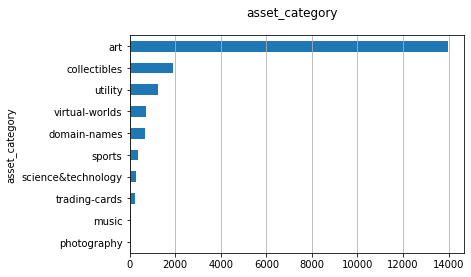

In [48]:
fig, ax = plt.subplots()
fig.suptitle("asset_category", fontsize=12)
df["asset_category"].reset_index().groupby("asset_category").count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

### 1. imbalanced data processing

In [49]:
# oversampling and undersampling
def balance_data(df,target_cate):
  balance_df=pd.DataFrame()
  target_num=len(df.loc[df['asset_category']==target_cate],)
  # target_num=80
  cate_list=df.asset_category.unique()
  for i in cate_list:
    cate_num=len(df.loc[df['asset_category']==i],)
    if cate_num>target_num:
      tmp=df.loc[df['asset_category']==i].sample(target_num,replace=False)
    elif cate_num<target_num:
      tmp=df.loc[df['asset_category']==i].sample(target_num,replace=True)
    else:
      tmp=df.loc[df['asset_category']==i]
    balance_df=pd.concat([balance_df,tmp],axis=0)
  return balance_df


## B. Function defined for classifiers

In [50]:
def classifiers(X,y,embedding,classifier_name):
    X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
    clf=Pipeline([('vectorizer',embedding),('clf',classifier_name)])
    clf.fit(X_train,y_train)
    predictions=clf.predict(X_test)
    global accuracy
    accuracy=accuracy_score(y_test,predictions)
    print(f'For classifier {classifier_name}:')
    print(f'\tThe accuracy score is {accuracy_score(y_test,predictions)}')
    print('\n')
    print(f'\t{classification_report(y_test,predictions,zero_division=0)}')
    print('\n')
    print('\n')

In [51]:
pip install tensorflow_text

In [52]:
import tensorflow_hub as hub
import tensorflow_text as text

In [53]:
process_url='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encode_url='https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'


In [54]:
def classifier_with_bert(X,y,classifier_name):
  clf=classifier_name
  clf.fit(bert_result['pooled_output'],y_train)
  predictions=clf.predict(bert_x_test['pooled_output'])
  global accuracy
  accuracy=accuracy_score(y_test,predictions)
  print(f'For classifier {classifier_name}:')
  print(f'\tThe accuracy score is {accuracy_score(y_test,predictions)}')
  print('\n')
  print(f'\t{classification_report(y_test,predictions,zero_division=0)}')
  print('\n')
  print('\n')

## C. Function defined for stopword changes

In [55]:
gdown.download(id='1gZlmqxCBUHBZZB5eLlN8bevJLQnQlS2h',quiet=False) #now
gdown.download(id='175GDNRXvpTk1wpnQw6-RLV8D9s9oyeEB',quiet=False) #word frequency for different category
gdown.download(id='19zl3BY9JX13Yt6Lxqll5sKndtmh7W1EY',quiet=False) #word frequency for common
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
from nltk.stem.porter import PorterStemmer
def removeStopwords(wordlist, stopwords):
    return [w for w in wordlist if w not in stopwords]
def word_stem(wordlist):
    p_stemmer=PorterStemmer()
    return [p_stemmer.stem(w) for w in wordlist]

Downloading...
From: https://drive.google.com/uc?id=1gZlmqxCBUHBZZB5eLlN8bevJLQnQlS2h
To: /content/NFT news.xlsx
100%|██████████| 25.0k/25.0k [00:00<00:00, 12.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=175GDNRXvpTk1wpnQw6-RLV8D9s9oyeEB
To: /content/[no NOW]word dictionary by category.xlsx
100%|██████████| 706k/706k [00:00<00:00, 97.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=19zl3BY9JX13Yt6Lxqll5sKndtmh7W1EY
To: /content/High frequency word for common.csv
100%|██████████| 205k/205k [00:00<00:00, 50.3MB/s]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
accuracy_df=pd.DataFrame(columns=['accuracy_score','sampling_target','input','stop_word','word_embedding','classifier'])

accuracy_df

,accuracy_score,sampling_target,input,stop_word,word_embedding,classifier


# II. Diiferent combination with input and stopword changes

## A. Description as the only input with simplist stopwords

### 1. stopwords

In [57]:
stopwords=nltk.corpus.stopwords.words('english')
df_tmp=df.copy()
for i in range(len(df_tmp)):
    df_tmp.description[i]=' '.join(word_stem(removeStopwords(str(df.description[i]).split(),stopwords)))
training_df=df_tmp[['description','asset_category']].copy()
training_df=training_df[~training_df.description.isna()]
training_df=balance_data(training_df,'science&technology')
print(training_df.asset_category.value_counts())
X=list(training_df['description'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


art                   261
photography           261
trading-cards         261
virtual-worlds        261
sports                261
collectibles          261
utility               261
science&technology    261
domain-names          261
music                 261
Name: asset_category, dtype: int64


### 2. [science&technology as target cate] classification with tfidf and counvectorizer

In [58]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_1=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_1.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description','stop_word':'nltk_english','word_embedding':'Tfidf','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_1}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7784222737819025


	                    precision    recall  f1-score   support

               art       0.66      0.31      0.42        87
      collectibles       0.96      0.46      0.62       102
      domain-names       0.89      0.98      0.93        86
             music       0.81      0.88      0.84        82
       photography       0.89      0.99      0.94        81
science&technology       0.99      0.89      0.93        88
            sports       0.43      0.93      0.59        75
     trading-cards       0.85      0.97      0.91        80
           utility       0.76      0.66      0.71        92
    virtual-worlds       0.86      0.83      0.85        89

          accuracy                           0.78       862
         macro avg       0.81      0.79      0.77       862
      weighted avg       0.82      0.78      0.77       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

In [59]:
accuracy_list_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description','stop_word':'nltk_english','word_embedding':'Count','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7900232018561485


	                    precision    recall  f1-score   support

               art       0.63      0.37      0.46        87
      collectibles       0.80      0.55      0.65       102
      domain-names       0.89      0.98      0.93        86
             music       0.88      0.88      0.88        82
       photography       0.93      0.99      0.96        81
science&technology       0.96      0.88      0.92        88
            sports       0.45      0.93      0.61        75
     trading-cards       0.87      0.95      0.91        80
           utility       0.81      0.66      0.73        92
    virtual-worlds       0.90      0.82      0.86        89

          accuracy                           0.79       862
         macro avg       0.81      0.80      0.79       862
      weighted avg       0.82      0.79      0.79       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.802784222737819


	                    precision    recall  f1-score   support

               art       0.62      0.39      0.48        87
      collectibles       0.87      0.54      0.67       102
      domain-names       0.89      0.98      0.93        86
             music       0.90      0.88      0.89        82
       photography       0.99      0.99      0.99        81
science&technology       0.99      0.91      0.95        88
            sports       0.44      0.95      0.60        75
     trading-cards       0.90      0.95      0.93        80
           utility       0.86      0.72      0.78        92
    virtual-worlds       0.86      0.83      0.85        89

          accuracy                           0.80       862
         macro avg       0.83      0.81      0.81       862
      weighted avg       0.84      0.80      0.80       862





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.79814

### 3. BERT within original description

In [60]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
bert_process_model = hub.KerasLayer(process_url)
X_train_processed = bert_process_model(X_train)
bert_model=hub.KerasLayer(encode_url)
bert_result=bert_model(X_train_processed)
X_test_processed=bert_process_model(X_test)
bert_x_test=bert_model(X_test_processed)
classifier_list=[BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_bert=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifier_with_bert(X,y,classifier_name=i)
    index+=1
    accuracy_list_bert.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description','stop_word':'nltk_english','word_embedding':'Bert','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_bert}))

Method 1:
For classifier BernoulliNB():
	The accuracy score is 0.4443155452436195


	                    precision    recall  f1-score   support

               art       0.00      0.00      0.00        87
      collectibles       0.50      0.01      0.02       102
      domain-names       0.42      0.95      0.58        86
             music       0.51      0.35      0.42        82
       photography       0.27      0.72      0.40        81
science&technology       0.67      0.38      0.48        88
            sports       0.34      0.60      0.43        75
     trading-cards       0.75      0.61      0.68        80
           utility       0.86      0.34      0.48        92
    virtual-worlds       0.51      0.62      0.56        89

          accuracy                           0.44       862
         macro avg       0.48      0.46      0.41       862
      weighted avg       0.49      0.44      0.40       862





Method 2:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7807424593967517


	                    precision    recall  f1-score   support

               art       0.55      0.30      0.39        87
      collectibles       0.82      0.48      0.60       102
      domain-names       0.89      0.98      0.93        86
             music       0.89      0.88      0.88        82
       photography       0.94      0.99      0.96        81
science&technology       0.93      0.89      0.91        88
            sports       0.44      0.96      0.60        75
     trading-cards       0.89      0.95      0.92        80
           utility       0.85      0.67      0.75        92
    virtual-worlds       0.83      0.83      0.83        89

          accuracy                           0.78       862
         macro avg       0.80      0.79      0.78       862
      weighted avg       0.81      0.78      0.78       862





Method 3:
For classifier RandomForestClassifier():
	The accuracy score is 0.7946

### 4. [art as target cate] classification with tfidf and counvectorizer

In [61]:
training_df=df_tmp[['description','asset_category']].copy()
training_df=training_df[~df_tmp.description.isna()]
training_df=balance_data(training_df,'art')
print(training_df.asset_category.value_counts())
X=list(training_df['description'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

art                   13992
photography           13992
trading-cards         13992
virtual-worlds        13992
sports                13992
collectibles          13992
utility               13992
science&technology    13992
domain-names          13992
music                 13992
Name: asset_category, dtype: int64


In [62]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_1_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_1_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'art','input':'description','stop_word':'nltk_english','word_embedding':'Tfidf','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_1_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.8747346991813575


	                    precision    recall  f1-score   support

               art       0.93      0.50      0.65      4568
      collectibles       0.93      0.73      0.82      4719
      domain-names       0.90      1.00      0.95      4560
             music       0.96      0.88      0.92      4686
       photography       1.00      0.97      0.98      4618
science&technology       0.99      0.92      0.96      4615
            sports       0.53      1.00      0.69      4577
     trading-cards       0.96      0.99      0.98      4528
           utility       0.98      0.87      0.92      4612
    virtual-worlds       0.94      0.88      0.91      4691

          accuracy                           0.87     46174
         macro avg       0.91      0.88      0.88     46174
      weighted avg       0.91      0.87      0.88     46174





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.8

In [63]:
accuracy_list_2_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_2_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'art','input':'description','stop_word':'nltk_english','word_embedding':'Count','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_2_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.865270498548967


	                    precision    recall  f1-score   support

               art       0.85      0.50      0.63      4568
      collectibles       0.91      0.72      0.80      4719
      domain-names       0.90      1.00      0.94      4560
             music       0.96      0.88      0.92      4686
       photography       1.00      0.97      0.98      4618
science&technology       0.99      0.92      0.95      4615
            sports       0.53      1.00      0.69      4577
     trading-cards       0.96      0.99      0.98      4528
           utility       0.95      0.84      0.89      4612
    virtual-worlds       0.94      0.83      0.88      4691

          accuracy                           0.87     46174
         macro avg       0.90      0.87      0.87     46174
      weighted avg       0.90      0.87      0.87     46174





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.81

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.8868627366050158


	                    precision    recall  f1-score   support

               art       0.96      0.56      0.71      4568
      collectibles       0.96      0.77      0.85      4719
      domain-names       0.91      1.00      0.95      4560
             music       0.96      0.88      0.92      4686
       photography       1.00      0.97      0.99      4618
science&technology       1.00      0.92      0.96      4615
            sports       0.53      0.99      0.69      4577
     trading-cards       1.00      0.99      0.99      4528
           utility       0.99      0.88      0.93      4612
    virtual-worlds       0.94      0.91      0.92      4691

          accuracy                           0.89     46174
         macro avg       0.92      0.89      0.89     46174
      weighted avg       0.92      0.89      0.89     46174





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.8870

## starting to use description, name and trait as input

In [64]:
import json
set(re.findall(r'\'(\w*_\w*)\':',df['traits'][0]))
# rs=json.loads(a)
trait_list=[]
for i in range(len(df)):
    if (~pd.isna(df['traits'][i]))&(df['traits'][i]!='[]'):
        tmp=re.findall(r'\'(\w*_*\w*)\':',df['traits'][i])
        trait_list.append(tmp)
trait_list=list(set(trait_list[0]))
trait_list.extend(['max_','none'])
df['texts']=df['name']+' '+df['description']+' '+df['traits']
df.texts=df.texts.apply(lambda x:re.sub(r'[^\w\s]','',str(x).lower())) # delete all the punctuations and special characters
for i in trait_list:
    df.texts=df.texts.apply(lambda x:re.sub(r'\d','',str(x).lower()).replace(i,'')) #delete the key values
    df.texts=df.texts.apply(lambda x:re.sub(r'\s{2,}',' ',x)) # delete the space more than once
df.texts=df.texts.apply(lambda x:re.sub(r'nan','',x))

## B. remove stopwords from now and stem back to original

### 1. stopwords

In [65]:
# add the high frequent word in NOW to the stopwords
stopwords=nltk.corpus.stopwords.words('english')
now_noun=pd.read_excel('NFT news.xlsx',sheet_name='NFT news noun',index_col='HELP')
now_adj=pd.read_excel('NFT news.xlsx',sheet_name='NFT news adj',index_col='HELP')
noun=now_noun['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(noun)):
    noun[i]=noun[i].lower()
adj=now_adj['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(adj)):
    adj[i]=str(adj[i]).lower()
stopwords.extend(noun)
stopwords.extend(adj)
stopwords=word_stem(stopwords)
stopwords=list(set(stopwords))
stopwords[0:5]
# pd.DataFrame(stopwords).to_csv('stopwords with now.csv',index=False)

['futur', 'they', 'do', 'variou', 'lot']

In [66]:
df_tmp=df.copy()
for i in range(len(df_tmp)):
    df_tmp.texts[i]=' '.join(word_stem(removeStopwords(df_tmp.texts[i].split(),stopwords)))
training_df=df_tmp[['texts','asset_category']].copy()
training_df=training_df[~training_df.texts.isna()]
training_df=balance_data(training_df,'science&technology')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


art                   261
photography           261
trading-cards         261
virtual-worlds        261
sports                261
collectibles          261
utility               261
science&technology    261
domain-names          261
music                 261
Name: asset_category, dtype: int64


### 2. [science&technology as target cate] classification with tfidf and counvectorizer

In [67]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_3=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_3.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW','word_embedding':'Tfidf','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_3}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7691415313225058


	                    precision    recall  f1-score   support

               art       0.71      0.20      0.31        87
      collectibles       0.85      0.43      0.57       102
      domain-names       0.89      0.99      0.94        86
             music       0.89      0.80      0.85        82
       photography       0.95      0.89      0.92        81
science&technology       0.95      0.93      0.94        88
            sports       0.44      0.95      0.60        75
     trading-cards       0.81      1.00      0.89        80
           utility       0.67      0.78      0.72        92
    virtual-worlds       0.86      0.83      0.85        89

          accuracy                           0.77       862
         macro avg       0.80      0.78      0.76       862
      weighted avg       0.81      0.77      0.75       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

In [68]:
accuracy_list_4=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_4.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW','word_embedding':'Count','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_4}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7691415313225058


	                    precision    recall  f1-score   support

               art       0.53      0.23      0.32        87
      collectibles       0.68      0.56      0.61       102
      domain-names       0.89      0.99      0.94        86
             music       0.92      0.80      0.86        82
       photography       0.96      0.89      0.92        81
science&technology       0.90      0.91      0.90        88
            sports       0.45      0.95      0.61        75
     trading-cards       0.93      1.00      0.96        80
           utility       0.73      0.75      0.74        92
    virtual-worlds       0.91      0.71      0.80        89

          accuracy                           0.77       862
         macro avg       0.79      0.78      0.77       862
      weighted avg       0.79      0.77      0.76       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7830626450116009


	                    precision    recall  f1-score   support

               art       0.53      0.33      0.41        87
      collectibles       0.77      0.49      0.60       102
      domain-names       0.89      0.99      0.94        86
             music       0.93      0.80      0.86        82
       photography       0.99      0.89      0.94        81
science&technology       1.00      0.93      0.96        88
            sports       0.41      0.92      0.57        75
     trading-cards       0.95      1.00      0.98        80
           utility       0.89      0.76      0.82        92
    virtual-worlds       0.81      0.81      0.81        89

          accuracy                           0.78       862
         macro avg       0.82      0.79      0.79       862
      weighted avg       0.82      0.78      0.78       862





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.7911

### 3. Bert

In [69]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
bert_process_model = hub.KerasLayer(process_url)
X_train_processed = bert_process_model(X_train)
bert_model=hub.KerasLayer(encode_url)
bert_result=bert_model(X_train_processed)
X_test_processed = bert_process_model(X_test)
bert_x_test=bert_model(X_test_processed)
classifier_list=[BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_bert_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifier_with_bert(X,y,classifier_name=i)
    index+=1
    accuracy_list_bert_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW','word_embedding':'Bert','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_bert_2}))

Method 1:
For classifier BernoulliNB():
	The accuracy score is 0.4582366589327146


	                    precision    recall  f1-score   support

               art       0.10      0.03      0.05        87
      collectibles       0.40      0.04      0.07       102
      domain-names       0.52      0.92      0.66        86
             music       0.74      0.43      0.54        82
       photography       0.45      0.54      0.49        81
science&technology       0.74      0.28      0.41        88
            sports       0.32      0.51      0.39        75
     trading-cards       0.39      0.90      0.55        80
           utility       0.40      0.50      0.44        92
    virtual-worlds       0.68      0.55      0.61        89

          accuracy                           0.46       862
         macro avg       0.47      0.47      0.42       862
      weighted avg       0.47      0.46      0.41       862





Method 2:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7633410672853829


	                    precision    recall  f1-score   support

               art       0.41      0.21      0.27        87
      collectibles       0.65      0.52      0.58       102
      domain-names       0.88      0.99      0.93        86
             music       0.92      0.80      0.86        82
       photography       0.92      0.89      0.91        81
science&technology       1.00      0.91      0.95        88
            sports       0.45      0.96      0.61        75
     trading-cards       0.94      0.97      0.96        80
           utility       0.78      0.71      0.74        92
    virtual-worlds       0.84      0.78      0.81        89

          accuracy                           0.76       862
         macro avg       0.78      0.77      0.76       862
      weighted avg       0.78      0.76      0.76       862





Method 3:
For classifier RandomForestClassifier():
	The accuracy score is 0.7099

### 4. [art as target cate] classification with tfidf and counvectorizer

In [70]:
training_df=df_tmp[['texts','asset_category']].copy()
training_df=training_df[~training_df.texts.isna()]
training_df=balance_data(training_df,'art')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

art                   13992
photography           13992
trading-cards         13992
virtual-worlds        13992
sports                13992
collectibles          13992
utility               13992
science&technology    13992
domain-names          13992
music                 13992
Name: asset_category, dtype: int64


In [71]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_3_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_3_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'art','input':'description_name_trait','stop_word':'nltk_english+NOW','word_embedding':'Tfidf','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_3_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7950794819595444


	                    precision    recall  f1-score   support

               art       0.93      0.49      0.64      4568
      collectibles       0.91      0.72      0.80      4719
      domain-names       0.90      1.00      0.95      4560
             music       0.95      0.76      0.85      4686
       photography       1.00      0.91      0.95      4618
science&technology       1.00      0.92      0.96      4615
            sports       0.86      0.41      0.56      4577
     trading-cards       0.37      0.99      0.54      4528
           utility       0.98      0.85      0.91      4612
    virtual-worlds       0.94      0.90      0.92      4691

          accuracy                           0.80     46174
         macro avg       0.88      0.80      0.81     46174
      weighted avg       0.89      0.80      0.81     46174





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.8

In [72]:
accuracy_list_4_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_4_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'art','input':'description_name_trait','stop_word':'nltk_english+NOW','word_embedding':'Count','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_4}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7867847706501494


	                    precision    recall  f1-score   support

               art       0.83      0.52      0.64      4568
      collectibles       0.90      0.72      0.80      4719
      domain-names       0.90      1.00      0.95      4560
             music       0.96      0.76      0.85      4686
       photography       1.00      0.91      0.95      4618
science&technology       0.97      0.92      0.94      4615
            sports       0.88      0.41      0.56      4577
     trading-cards       0.37      0.99      0.54      4528
           utility       0.98      0.85      0.91      4612
    virtual-worlds       0.95      0.80      0.87      4691

          accuracy                           0.79     46174
         macro avg       0.87      0.79      0.80     46174
      weighted avg       0.87      0.79      0.80     46174





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.8

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.8806471174253909


	                    precision    recall  f1-score   support

               art       0.99      0.71      0.83      4568
      collectibles       0.96      0.73      0.83      4719
      domain-names       1.00      1.00      1.00      4560
             music       0.99      0.76      0.86      4686
       photography       1.00      0.91      0.95      4618
science&technology       1.00      0.92      0.96      4615
            sports       0.48      1.00      0.65      4577
     trading-cards       0.98      1.00      0.99      4528
           utility       0.99      0.87      0.92      4612
    virtual-worlds       0.95      0.92      0.93      4691

          accuracy                           0.88     46174
         macro avg       0.93      0.88      0.89     46174
      weighted avg       0.93      0.88      0.89     46174





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.8768

## C. stopwords=nft_new-10cate+common 200

### 1. stopwords

In [73]:
stopwords=nltk.corpus.stopwords.words('english')
now_noun=pd.read_excel('NFT news.xlsx',sheet_name='NFT news noun',index_col='HELP')
now_adj=pd.read_excel('NFT news.xlsx',sheet_name='NFT news adj',index_col='HELP')
noun=now_noun['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(noun)):
    noun[i]=noun[i].lower()
adj=now_adj['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(adj)):
    adj[i]=str(adj[i]).lower()
#10 categories' high frequent words
cate_sep=[]
for i in range(10):
    cate_sep.extend(pd.read_excel('[no NOW]word dictionary by category.xlsx',sheet_name=i).loc[0:200,'Word'].tolist())
#common frequent (top 200)
common_=pd.read_csv('High frequency word for common.csv').loc[0:200,'Word']
noun.extend(adj)
noun.extend(common_)
add_stop=list(set(noun)-set(cate_sep))
stopwords.extend(add_stop)
stopwords=word_stem(stopwords)
stopwords=list(set(stopwords))
stopwords[0:5]
# pd.DataFrame(stopwords).to_csv('stopwords with venn.csv',index=False)

['futur', 'they', 'do', 'variou', 'lot']

In [74]:
df_tmp=df.copy()
for i in range(len(df_tmp)):
    df_tmp.texts[i]=' '.join(word_stem(removeStopwords(df.texts[i].split(),stopwords)))
training_df=df_tmp[['texts','asset_category']]
training_df=training_df[~training_df.texts.isna()]
training_df=balance_data(training_df,'science&technology')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


art                   261
photography           261
trading-cards         261
virtual-worlds        261
sports                261
collectibles          261
utility               261
science&technology    261
domain-names          261
music                 261
Name: asset_category, dtype: int64


### 2. [science&technology as target cate] classification with tfidf and counvectorizer

In [75]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_5=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_5.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW-10 cate+common 200','word_embedding':'Tfidf','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_5}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.759860788863109


	                    precision    recall  f1-score   support

               art       0.71      0.25      0.37        87
      collectibles       0.81      0.37      0.51       102
      domain-names       0.91      1.00      0.96        86
             music       0.79      0.72      0.75        82
       photography       0.94      0.90      0.92        81
science&technology       1.00      0.92      0.96        88
            sports       0.41      0.93      0.57        75
     trading-cards       0.82      0.99      0.90        80
           utility       0.70      0.79      0.74        92
    virtual-worlds       0.89      0.83      0.86        89

          accuracy                           0.76       862
         macro avg       0.80      0.77      0.75       862
      weighted avg       0.80      0.76      0.75       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.66

In [76]:
accuracy_list_6=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_6.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW-10 cate+common 200','word_embedding':'Count','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_6}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7703016241299304


	                    precision    recall  f1-score   support

               art       0.55      0.30      0.39        87
      collectibles       0.71      0.57      0.63       102
      domain-names       0.91      1.00      0.95        86
             music       0.88      0.72      0.79        82
       photography       0.95      0.90      0.92        81
science&technology       0.98      0.92      0.95        88
            sports       0.41      0.95      0.57        75
     trading-cards       0.94      0.97      0.96        80
           utility       0.80      0.76      0.78        92
    virtual-worlds       0.94      0.70      0.80        89

          accuracy                           0.77       862
         macro avg       0.81      0.78      0.77       862
      weighted avg       0.81      0.77      0.77       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7726218097447796


	                    precision    recall  f1-score   support

               art       0.62      0.30      0.40        87
      collectibles       0.74      0.48      0.58       102
      domain-names       0.91      0.98      0.94        86
             music       0.92      0.72      0.81        82
       photography       0.94      0.90      0.92        81
science&technology       1.00      0.93      0.96        88
            sports       0.37      0.91      0.53        75
     trading-cards       0.95      0.99      0.97        80
           utility       0.84      0.75      0.79        92
    virtual-worlds       0.87      0.87      0.87        89

          accuracy                           0.77       862
         macro avg       0.82      0.78      0.78       862
      weighted avg       0.82      0.77      0.78       862





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.7911

### 3. Bert

In [77]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
bert_process_model = hub.KerasLayer(process_url)
X_train_processed = bert_process_model(X_train)
bert_model=hub.KerasLayer(encode_url)
bert_result=bert_model(X_train_processed)
X_test_processed = bert_process_model(X_test)
bert_x_test=bert_model(X_test_processed)
classifier_list=[BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_bert_3=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifier_with_bert(X,y,classifier_name=i)
    index+=1
    accuracy_list_bert_3.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW-10 cate+common 200','word_embedding':'Bert','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_bert_3}))

Method 1:
For classifier BernoulliNB():
	The accuracy score is 0.41531322505800466


	                    precision    recall  f1-score   support

               art       0.07      0.05      0.06        87
      collectibles       0.67      0.12      0.20       102
      domain-names       0.39      0.93      0.55        86
             music       1.00      0.04      0.07        82
       photography       0.39      0.54      0.45        81
science&technology       0.83      0.23      0.36        88
            sports       0.33      0.61      0.43        75
     trading-cards       0.42      0.85      0.56        80
           utility       0.51      0.47      0.49        92
    virtual-worlds       0.72      0.43      0.54        89

          accuracy                           0.42       862
         macro avg       0.53      0.43      0.37       862
      weighted avg       0.54      0.42      0.37       862





Method 2:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7529002320185615


	                    precision    recall  f1-score   support

               art       0.47      0.26      0.34        87
      collectibles       0.65      0.46      0.54       102
      domain-names       0.89      1.00      0.94        86
             music       0.89      0.72      0.80        82
       photography       0.90      0.90      0.90        81
science&technology       0.98      0.90      0.93        88
            sports       0.40      0.92      0.56        75
     trading-cards       0.92      0.99      0.95        80
           utility       0.79      0.66      0.72        92
    virtual-worlds       0.90      0.82      0.86        89

          accuracy                           0.75       862
         macro avg       0.78      0.76      0.75       862
      weighted avg       0.78      0.75      0.75       862





Method 3:
For classifier RandomForestClassifier():
	The accuracy score is 0.7088

### 4. [art as target cate] classification with tfidf and counvectorizer

In [78]:
training_df=df_tmp[['texts','asset_category']]
training_df=training_df[~training_df.texts.isna()]
training_df=balance_data(training_df,'art')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

art                   13992
photography           13992
trading-cards         13992
virtual-worlds        13992
sports                13992
collectibles          13992
utility               13992
science&technology    13992
domain-names          13992
music                 13992
Name: asset_category, dtype: int64


In [79]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_5_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_5_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'art','input':'description_name_trait','stop_word':'nltk_english+NOW-10 cate+common 200','word_embedding':'Tfidf','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_5_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7974617750249058


	                    precision    recall  f1-score   support

               art       0.93      0.49      0.65      4568
      collectibles       0.92      0.71      0.80      4719
      domain-names       0.90      1.00      0.95      4560
             music       0.95      0.76      0.85      4686
       photography       1.00      0.91      0.95      4618
science&technology       1.00      0.93      0.96      4615
            sports       0.86      0.42      0.57      4577
     trading-cards       0.37      0.99      0.54      4528
           utility       0.98      0.86      0.92      4612
    virtual-worlds       0.94      0.89      0.91      4691

          accuracy                           0.80     46174
         macro avg       0.89      0.80      0.81     46174
      weighted avg       0.89      0.80      0.81     46174





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.7

In [80]:
accuracy_list_6_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_6_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'art','input':'description_name_trait','stop_word':'nltk_english+NOW-10 cate+common 200','word_embedding':'Count','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_6_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7870879715857408


	                    precision    recall  f1-score   support

               art       0.80      0.52      0.63      4568
      collectibles       0.90      0.71      0.79      4719
      domain-names       0.90      1.00      0.95      4560
             music       0.96      0.76      0.85      4686
       photography       1.00      0.91      0.95      4618
science&technology       0.97      0.93      0.95      4615
            sports       0.88      0.42      0.57      4577
     trading-cards       0.37      0.99      0.54      4528
           utility       0.98      0.85      0.91      4612
    virtual-worlds       0.95      0.78      0.86      4691

          accuracy                           0.79     46174
         macro avg       0.87      0.79      0.80     46174
      weighted avg       0.87      0.79      0.80     46174





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.7

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.8817949495387014


	                    precision    recall  f1-score   support

               art       1.00      0.71      0.83      4568
      collectibles       0.96      0.73      0.83      4719
      domain-names       1.00      1.00      1.00      4560
             music       0.99      0.76      0.86      4686
       photography       1.00      0.91      0.95      4618
science&technology       1.00      0.93      0.96      4615
            sports       0.49      1.00      0.65      4577
     trading-cards       0.98      1.00      0.99      4528
           utility       0.99      0.87      0.92      4612
    virtual-worlds       0.95      0.91      0.93      4691

          accuracy                           0.88     46174
         macro avg       0.93      0.88      0.89     46174
      weighted avg       0.93      0.88      0.89     46174





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.8783

## D. stopwords=nft_new+10cate-common 200

### 1. stopwords

In [81]:
stopwords=nltk.corpus.stopwords.words('english')
now_noun=pd.read_excel('NFT news.xlsx',sheet_name='NFT news noun',index_col='HELP')
now_adj=pd.read_excel('NFT news.xlsx',sheet_name='NFT news adj',index_col='HELP')
noun=now_noun['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(noun)):
    noun[i]=noun[i].lower()
adj=now_adj['WORD (CLICK FOR CONTEXT)'].values.tolist()
for i in range(len(adj)):
    adj[i]=str(adj[i]).lower()
#10 categories' high frequent words
cate_sep=[]
for i in range(10):
    cate_sep.extend(pd.read_excel('[no NOW]word dictionary by category.xlsx',sheet_name=i).loc[0:200,'Word'].tolist())
#common frequent (top 200)
common_=pd.read_csv('High frequency word for common.csv').loc[0:200,'Word']
noun.extend(adj)
noun.extend(cate_sep)
add_stop=list(set(noun)-set(common_))
stopwords.extend(add_stop)
stopwords=word_stem(stopwords)
stopwords=list(set(stopwords))
stopwords[0:5]
# pd.DataFrame(stopwords).to_csv('stopwords with venn reverse200.csv',index=False)

['futur', 'traudeeth', 'animoca', 'they', 'do']

In [82]:
df_tmp=df.copy()
for i in range(len(df_tmp)):
    df_tmp.texts[i]=' '.join(word_stem(removeStopwords(df.texts[i].split(),stopwords)))
training_df=df_tmp[['texts','asset_category']].copy()
training_df=training_df[~training_df.texts.isna()]
training_df=balance_data(training_df,'science&technology')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


art                   261
photography           261
trading-cards         261
virtual-worlds        261
sports                261
collectibles          261
utility               261
science&technology    261
domain-names          261
music                 261
Name: asset_category, dtype: int64


### 2. [science&technology as target cate] classification with tfidf and counvectorizer

In [83]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_7=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_7.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW+10 cate-common 200','word_embedding':'Tfidf','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_7}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7819025522041764


	                    precision    recall  f1-score   support

               art       0.93      0.32      0.48        87
      collectibles       0.84      0.42      0.56       102
      domain-names       0.89      1.00      0.94        86
             music       0.94      0.78      0.85        82
       photography       0.91      0.88      0.89        81
science&technology       0.99      0.93      0.96        88
            sports       0.43      0.97      0.60        75
     trading-cards       0.76      0.97      0.86        80
           utility       0.72      0.86      0.79        92
    virtual-worlds       0.93      0.79      0.85        89

          accuracy                           0.78       862
         macro avg       0.84      0.79      0.78       862
      weighted avg       0.84      0.78      0.78       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

In [84]:
accuracy_list_8=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_8.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW+10 cate-common 200','word_embedding':'Count','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_8}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7749419953596288


	                    precision    recall  f1-score   support

               art       0.67      0.38      0.49        87
      collectibles       0.72      0.58      0.64       102
      domain-names       0.89      1.00      0.94        86
             music       0.92      0.70      0.79        82
       photography       0.95      0.88      0.91        81
science&technology       0.93      0.93      0.93        88
            sports       0.43      0.97      0.60        75
     trading-cards       0.89      0.96      0.92        80
           utility       0.78      0.80      0.79        92
    virtual-worlds       0.97      0.63      0.76        89

          accuracy                           0.77       862
         macro avg       0.81      0.78      0.78       862
      weighted avg       0.82      0.77      0.78       862





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.6

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.8039443155452436


	                    precision    recall  f1-score   support

               art       0.69      0.41      0.52        87
      collectibles       0.85      0.55      0.67       102
      domain-names       0.90      1.00      0.95        86
             music       0.93      0.77      0.84        82
       photography       0.97      0.88      0.92        81
science&technology       1.00      0.93      0.96        88
            sports       0.42      0.99      0.58        75
     trading-cards       0.90      1.00      0.95        80
           utility       0.92      0.77      0.84        92
    virtual-worlds       0.91      0.83      0.87        89

          accuracy                           0.80       862
         macro avg       0.85      0.81      0.81       862
      weighted avg       0.85      0.80      0.81       862





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.8132

### 3. Bert

In [85]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)
bert_process_model = hub.KerasLayer(process_url)
X_train_processed = bert_process_model(X_train)
bert_model=hub.KerasLayer(encode_url)
bert_result=bert_model(X_train_processed)
X_test_processed = bert_process_model(X_test)
bert_x_test=bert_model(X_test_processed)
classifier_list=[BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_bert_4=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifier_with_bert(X,y,classifier_name=i)
    index+=1
    accuracy_list_bert_4.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'science&technology','input':'description_name_trait','stop_word':'nltk_english+NOW+10 cate-common 200','word_embedding':'Bert','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_bert_4}))

Method 1:
For classifier BernoulliNB():
	The accuracy score is 0.47447795823665895


	                    precision    recall  f1-score   support

               art       0.11      0.01      0.02        87
      collectibles       0.48      0.13      0.20       102
      domain-names       0.47      0.91      0.62        86
             music       0.92      0.43      0.58        82
       photography       0.51      0.60      0.55        81
science&technology       0.51      0.40      0.45        88
            sports       0.32      0.56      0.41        75
     trading-cards       0.41      0.84      0.55        80
           utility       0.51      0.52      0.51        92
    virtual-worlds       0.62      0.46      0.53        89

          accuracy                           0.47       862
         macro avg       0.49      0.49      0.44       862
      weighted avg       0.49      0.47      0.44       862





Method 2:


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.7621809744779582


	                    precision    recall  f1-score   support

               art       0.51      0.32      0.39        87
      collectibles       0.68      0.43      0.53       102
      domain-names       0.88      0.99      0.93        86
             music       0.95      0.77      0.85        82
       photography       0.93      0.88      0.90        81
science&technology       0.99      0.91      0.95        88
            sports       0.42      0.92      0.57        75
     trading-cards       0.91      0.96      0.93        80
           utility       0.75      0.75      0.75        92
    virtual-worlds       0.89      0.80      0.84        89

          accuracy                           0.76       862
         macro avg       0.79      0.77      0.77       862
      weighted avg       0.79      0.76      0.76       862





Method 3:
For classifier RandomForestClassifier():
	The accuracy score is 0.7296

### 4. [art as target cate] classification with tfidf and counvectorizer

In [86]:
training_df=df_tmp[['texts','asset_category']].copy()
training_df=training_df[~training_df.texts.isna()]
training_df=balance_data(training_df,'art')
print(training_df.asset_category.value_counts())
X=list(training_df['texts'].astype('str').values)
y=training_df.asset_category.astype('str').values
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=45,test_size=0.33)

art                   13992
photography           13992
trading-cards         13992
virtual-worlds        13992
sports                13992
collectibles          13992
utility               13992
science&technology    13992
domain-names          13992
music                 13992
Name: asset_category, dtype: int64


In [87]:
classifier_list=[MultinomialNB(),BernoulliNB(),LinearSVC(),RandomForestClassifier(),tree.DecisionTreeClassifier(),XGBClassifier()]
accuracy_list_7_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=TfidfVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_7_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'art','input':'description_name_trait','stop_word':'nltk_english+NOW+10 cate-common 200','word_embedding':'Tfidf','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_7_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7994758955256205


	                    precision    recall  f1-score   support

               art       0.94      0.50      0.65      4568
      collectibles       0.93      0.71      0.80      4719
      domain-names       0.90      1.00      0.95      4560
             music       0.95      0.78      0.86      4686
       photography       1.00      0.91      0.95      4618
science&technology       1.00      0.93      0.96      4615
            sports       0.86      0.42      0.57      4577
     trading-cards       0.38      0.99      0.54      4528
           utility       0.97      0.85      0.91      4612
    virtual-worlds       0.94      0.90      0.92      4691

          accuracy                           0.80     46174
         macro avg       0.89      0.80      0.81     46174
      weighted avg       0.89      0.80      0.81     46174





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.8

In [88]:
accuracy_list_8_2=[]
index=1
for i in classifier_list:
    print(f'Method {index}:')
    classifiers(X,y,embedding=CountVectorizer(stop_words='english'),classifier_name=i)
    index+=1
    accuracy_list_8_2.append(round(accuracy,4))
    accuracy_df=accuracy_df.append({'accuracy_score':accuracy,'sampling_target':'art','input':'description_name_trait','stop_word':'nltk_english+NOW+10 cate-common 200','word_embedding':'Count','classifier':str(i)},ignore_index=True)
print(pd.DataFrame({'Classifier':classifier_list,'Accuracy':accuracy_list_8_2}))

Method 1:
For classifier MultinomialNB():
	The accuracy score is 0.7908996404903192


	                    precision    recall  f1-score   support

               art       0.87      0.51      0.64      4568
      collectibles       0.88      0.71      0.79      4719
      domain-names       0.90      1.00      0.95      4560
             music       0.96      0.78      0.86      4686
       photography       1.00      0.91      0.95      4618
science&technology       0.97      0.93      0.95      4615
            sports       0.88      0.42      0.57      4577
     trading-cards       0.38      0.99      0.54      4528
           utility       0.98      0.84      0.90      4612
    virtual-worlds       0.95      0.82      0.88      4691

          accuracy                           0.79     46174
         macro avg       0.88      0.79      0.80     46174
      weighted avg       0.88      0.79      0.80     46174





Method 2:
For classifier BernoulliNB():
	The accuracy score is 0.8

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


For classifier LinearSVC():
	The accuracy score is 0.8716377181963876


	                    precision    recall  f1-score   support

               art       0.99      0.61      0.75      4568
      collectibles       0.96      0.72      0.83      4719
      domain-names       0.91      1.00      0.95      4560
             music       1.00      0.78      0.87      4686
       photography       1.00      0.91      0.95      4618
science&technology       1.00      0.93      0.96      4615
            sports       0.48      1.00      0.65      4577
     trading-cards       0.97      1.00      0.99      4528
           utility       0.99      0.87      0.92      4612
    virtual-worlds       0.95      0.91      0.93      4691

          accuracy                           0.87     46174
         macro avg       0.92      0.87      0.88     46174
      weighted avg       0.93      0.87      0.88     46174





Method 4:
For classifier RandomForestClassifier():
	The accuracy score is 0.8774

# III. Summary 

In [95]:
writer = pd.ExcelWriter('accuracy compare.xlsx')
accuracy_df.to_excel(writer,index=False,sheet_name='all combinations')
writer.save()

In [90]:
# accuracy_list_bert.insert(0,'N/A')
# accuracy_list_bert_2.insert(0,'N/A')
# accuracy_list_bert_3.insert(0,'N/A')
# accuracy_list_bert_4.insert(0,'N/A')

In [91]:
# accuracy_compare=dict()
# columnslists=['input: description, embedding: TFIDF, stopwords:nltk','input: description, embedding: count, stopwords:nltk','input: description, embedding: BERT, stopwords:nltk',
#                           'input: description+name+trait, embedding: TFIDF, stopwords:nltk+now','input: description+name+trait, embedding: count, stopwords:nltk+now','input: description+name+trait, embedding: BERT, stopwords:nltk+now',
#                           'input: description+name+trait, embedding: TFIDF, stopwords:nltk+now-10cate+common 200','input: description+name+trait, embedding: count, stopwords:nltk+now-10cate+common 200','input: description+name+trait, embedding: BERT, stopwords:nltk+now-10cate+common 200',
#                           'input: description+name+trait, embedding: TFIDF, stopwords:nltk+now+10cate-common 200','input: description+name+trait, embedding: count, stopwords:nltk+now+10cate-common 200','input: description+name+trait, embedding: BERT, stopwords:nltk+now+10cate-common 200']
# accuracylists=[accuracy_list_1,accuracy_list_2,accuracy_list_bert,accuracy_list_3,accuracy_list_4,accuracy_list_bert_2,accuracy_list_5,accuracy_list_6,accuracy_list_bert_3,accuracy_list_7,accuracy_list_8,accuracy_list_bert_4]
# for i in range(12):
#   accuracy_compare[columnslists[i]]=accuracylists[i]
# accuracy_compare=pd.DataFrame(accuracy_compare,index=['MultinomialNB','BernoulliNB','LinearSVC','RandomForestClassifier','DecisionTreeClassifier','XGBClassifier'])
# writer = pd.ExcelWriter('accuracy compare.xlsx')
# accuracy_compare.to_excel(writer)
# writer.save()

In [96]:
from google.colab import files
files.download('accuracy compare.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
accuracy_df

,accuracy_score,sampling_target,input,stop_word,word_embedding,classifier
0,0.778422,science&technology,description,nltk_english,Tfidf,MultinomialNB()
1,0.696056,science&technology,description,nltk_english,Tfidf,BernoulliNB()
2,0.802784,science&technology,description,nltk_english,Tfidf,LinearSVC()
3,0.800464,science&technology,description,nltk_english,Tfidf,RandomForestClassifier()
4,0.779582,science&technology,description,nltk_english,Tfidf,DecisionTreeClassifier()
...,...,...,...,...,...,...
111,0.824685,art,description_name_trait,nltk_english+NOW+10 cate-common 200,Count,BernoulliNB()
112,0.871638,art,description_name_trait,nltk_english+NOW+10 cate-common 200,Count,LinearSVC()
113,0.877442,art,description_name_trait,nltk_english+NOW+10 cate-common 200,Count,RandomForestClassifier()
114,0.872309,art,description_name_trait,nltk_english+NOW+10 cate-common 200,Count,DecisionTreeClassifier()


In [111]:
from pandas.core.reshape.pivot import pivot
collist=accuracy_df.columns.tolist()[1:]
pivot_dict={}
for i in collist:
  coltmp=collist.copy()
  coltmp.remove(i)
  pivot_dict[f"By {i}"]=pd.pivot_table(accuracy_df,index=i,columns=coltmp,values='accuracy_score')
pivot_dict.keys()

dict_keys(['By sampling_target', 'By input', 'By stop_word', 'By word_embedding', 'By classifier'])